### Link do dataset

In [165]:
# https://www.kaggle.com/datasets/saisaathvik/house-rent-prices-of-metropolitan-cities-in-india?select=Kolkata_rent.csv

### Descrição dos procedimentos de coleta de dados e significado dos atributos

In [166]:
# Os dados do dataset foram extraídos através do método Web-Scraping através de uma extensão do Google Chorme, chamada de Instant Data Scraper.
# Link: https://chrome.google.com/webstore/detail/instant-data-scraper/ofaokhiedipichpaobibbnahnkdoiiah

In [167]:
# O conteúdo do dataset é formado pelos seguintes atributos:
#       * Tipo de vendedor (seller_type);
#       * Numero de Quartos (bedroom);
#       * Tipo do layout (layout_type);
#       * Tipo da propriedade (property_type);
#       * Localização (location);
#       * Preço (price);
#       * Area (area);
#       * Tipo de mobilia (furnish_type);
#       * Numero de Banheiros (bathroom).

In [168]:
# Dataset ja vem por padrão sem dados duplicados.
# Caso houvesse a necessidade de restringir os dados duplicados seria usada a função "pd.dataframe.drop_duplicates()", passando como parametro o nome da coluns e axis=1
# Então, neste caso específico, não faz sentido remover os "valores duplicados" pois cada apartamento é único.


## Dependências e carregamento do Dataframe

In [169]:
import pandas as pd
import numpy as np
import statistics as st
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [170]:
chennai_df = pd.read_csv('Chennai.csv')
chennai_df['dataset'] = 'Chennai'

hyderabad_df = pd.read_csv('Hyderabad.csv')
hyderabad_df['dataset'] = 'Hydebarad'

kolkata_df = pd.read_csv('Kolkata.csv')
kolkata_df['dataset'] = 'Kolkata'

In [171]:
#chennai_df.head()

In [172]:
#hyderabad_df.head()

In [173]:
#kolkata_df.head()

In [174]:
df = pd.concat([chennai_df, hyderabad_df, kolkata_df])

### Tratamento Inicial

In [175]:
# Foi retirada a palavra 'bathrooms' da coluna bathroom para ser possível a contabilização dos banheiros,
# em seguida é retirada as virgulas da coluna price para em seguida converter-la para 'float64' e assim ser possível a realização de calculas e demonstração de gráficos

In [176]:
df['bathroom'] = df['bathroom'].str.replace('bathrooms', '')

In [177]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(np.float64)

In [ ]:
index = df.loc[df['price'] <= 8].index
df.drop(index, inplace=True)

## Hipóteses

In [178]:
df.corr()['price']

C:\Users\anjos\AppData\Local\Temp\ipykernel_30676\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


bedroom    0.504219
price      1.000000
area       0.423670
Name: price, dtype: float64

In [179]:
# Com base no resultado do cálculo do método de Correlação de Pearson, que demosntra a relação entre a coluna escolhida, neste caso preço (price), e as demais colunas é possível 
# observer que o preço do apartamento está altamente relacionado à quantidade de banheiros e em seguida à area do apartamento.

## Tratamento de dados ausentes

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29940 entries, 0 to 9899
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    29456 non-null  object 
 1   bedroom        29457 non-null  float64
 2   layout_type    29457 non-null  object 
 3   property_type  29457 non-null  object 
 4   locality       29457 non-null  object 
 5   price          29457 non-null  float64
 6   area           29457 non-null  float64
 7   furnish_type   29457 non-null  object 
 8   bathroom       28945 non-null  object 
 9   dataset        29940 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.5+ MB


In [181]:
# A estratégia escolhida para tratar dados ausentes foi excluir o registro, pois devido a quentidade de amostras a quantidade de registros excluidos é irrelevante

In [182]:
df.dropna(inplace=True)

## Análise numérica de estatísticas descritivas

##### Este método retorna valores da media, moda, mediana, desvio padrão e quartis do preço para cada atribudo escolhido da coluna de base

In [183]:
def analise_preco(coluna):
    global df
    
    dct_retorno = {}    
    s_coluna = df[coluna].value_counts()   
    
    for i in range(len(s_coluna)):
        dct_sts = {}
        index = s_coluna.index[i]
        
        
        preco = df[df[coluna] == index]['price']
        
        media = st.mean(preco)
        moda = st.mode(preco)
        mediana = st.median(preco)
        desvio_padrao = st.stdev(preco)
        quartis = st.quantiles(preco)
                
        dct_sts['MEDIA'] = round(media,2)
        dct_sts['MODA'] = round(moda,2)
        dct_sts['MEDIANA'] = round(mediana,2)
        dct_sts['DESVIO PADRAO'] = round(desvio_padrao,2)
        dct_sts['QUARTIS'] = quartis  
        
        #dct_retorno[index] = (dct_sts,preco) 
        dct_retorno[index] = dct_sts 
        
    
    return dct_retorno

##### Este método retorna valores da media, moda, mediana, desvio padrão e quartis da coluna de base

In [184]:
def analise_desc_num(coluna):
    global df
    
    dct_retorno = {}    
    s_coluna = df[coluna].value_counts()
      
    media = st.mean(s_coluna)
    moda = st.mode(s_coluna)
    mediana = st.median(s_coluna)
    desvio_padrao = st.stdev(s_coluna)
    quartis = st.quantiles(s_coluna)
    
    dct_retorno['MEDIA'] = media
    dct_retorno['MODA'] = moda
    dct_retorno['MEDIANA'] = mediana
    dct_retorno['DESVIO PADRAO'] = desvio_padrao
    dct_retorno['QUARTIS'] = quartis    
    
    return dct_retorno
    

### Análise individual dos atributos das colunas descritivas

#### Coluna - 'seller_type'

{'MEDIA': 9648, 'MODA': 15863, 'MEDIANA': 12938, 'DESVIO PADRAO': 8360.482940596195, 'QUARTIS': [143.0, 12938.0, 15863.0]}


<AxesSubplot: >

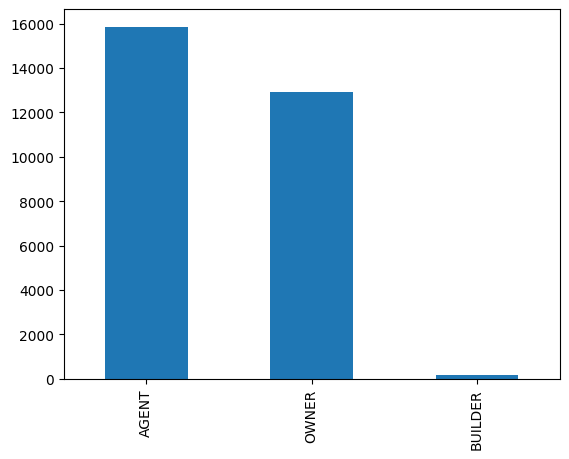

In [185]:
coluna_analise_seller_type = 'seller_type'

statis = analise_desc_num(coluna_analise_seller_type)


print(statis)
df[coluna_analise_seller_type].value_counts().plot(kind='bar')

#### Coluna - 'layout_type'

{'MEDIA': 14472, 'MODA': 27617, 'MEDIANA': 14472.0, 'DESVIO PADRAO': 18589.837277394334, 'QUARTIS': [-5245.5, 14472.0, 34189.5]}


<AxesSubplot: >

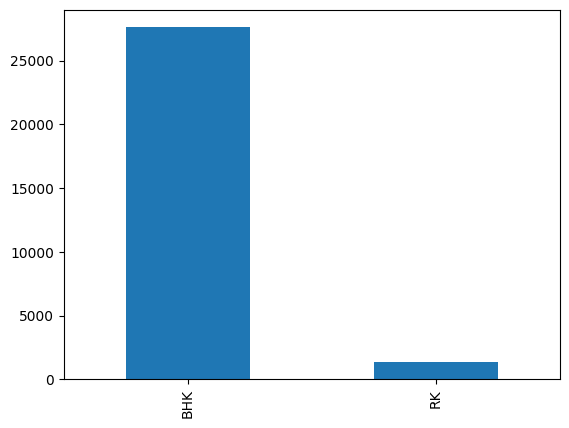

In [186]:
coluna_analise_layout_type = 'layout_type'

statis = analise_desc_num(coluna_analise_layout_type)


print(statis)
df[coluna_analise_layout_type].value_counts().plot(kind='bar')

#### Coluna - 'property_type'

{'MEDIA': 4824, 'MODA': 19549, 'MEDIANA': 2359.5, 'DESVIO PADRAO': 7400.188592191418, 'QUARTIS': [333.25, 2359.5, 8053.0]}


<AxesSubplot: >

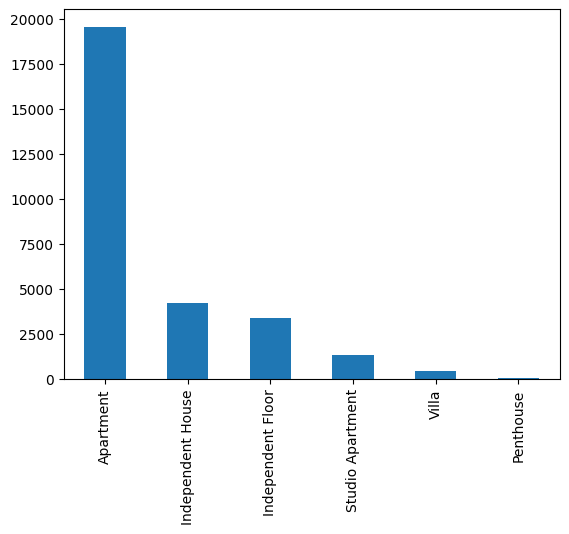

In [187]:
coluna_analise_property_type = 'property_type'

statis = analise_desc_num(coluna_analise_property_type)


print(statis)
df[coluna_analise_property_type].value_counts().plot(kind='bar')

### Analise do preco por atributo da coluna descritiva

#### Coluna - 'bathroom' x 'price'

<AxesSubplot: xlabel='price', ylabel='bathroom'>

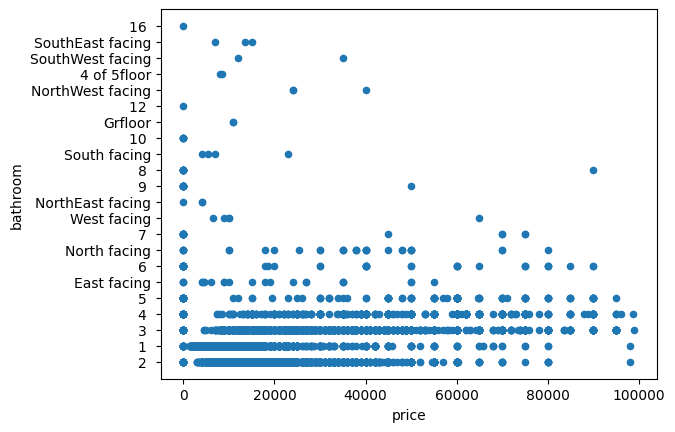

In [188]:
coluna_analise_banheiro_x_preco = 'bathroom'

df.plot(kind='scatter', x='price', y=coluna_analise_banheiro_x_preco)

#### Coluna - 'area' x 'price'

<AxesSubplot: xlabel='price', ylabel='area'>

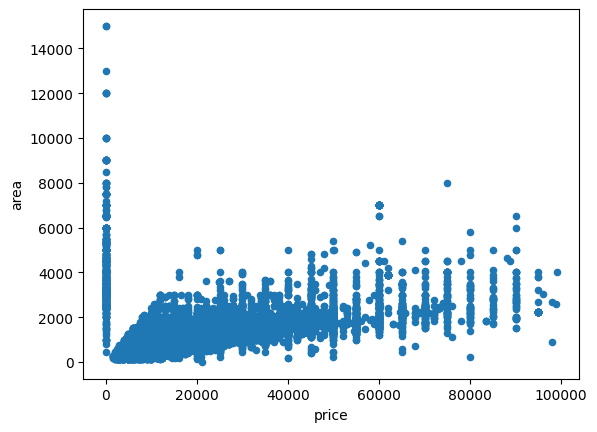

In [190]:
coluna_analise_area_x_preco = 'area'

df.plot(kind='scatter', x='price', y=coluna_analise_area_x_preco)

#### Coluna - 'seller_type' x 'price'

{'AGENT': {'MEDIA': 20560.18, 'MODA': 15000.0, 'MEDIANA': 17000.0, 'DESVIO PADRAO': 14850.69, 'QUARTIS': [10000.0, 17000.0, 25000.0]}, 'OWNER': {'MEDIA': 14225.37, 'MODA': 10000.0, 'MEDIANA': 12000.0, 'DESVIO PADRAO': 9823.15, 'QUARTIS': [8000.0, 12000.0, 17000.0]}, 'BUILDER': {'MEDIA': 27834.4, 'MODA': 30000.0, 'MEDIANA': 27000.0, 'DESVIO PADRAO': 18661.92, 'QUARTIS': [10500.0, 27000.0, 42000.0]}}


<AxesSubplot: xlabel='price', ylabel='seller_type'>

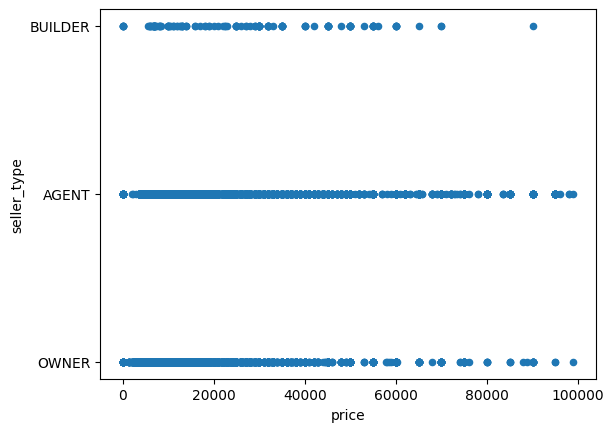

In [192]:
coluna_analise_seller_type_x_preco = 'seller_type'

statis = analise_preco(coluna_analise_seller_type_x_preco)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise_seller_type_x_preco)


<AxesSubplot: ylabel='price'>

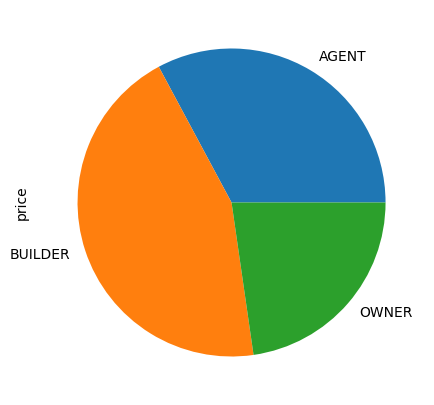

In [193]:
df.groupby(coluna_analise_seller_type_x_preco)['price'].mean().plot(kind='pie', rot=0, figsize=(15,5))

#### Coluna - 'layout_type' x 'price'

{'BHK': {'MEDIA': 18251.15, 'MODA': 15000.0, 'MEDIANA': 15000.0, 'DESVIO PADRAO': 13312.44, 'QUARTIS': [10000.0, 15000.0, 22000.0]}, 'RK': {'MEDIA': 7635.44, 'MODA': 5000.0, 'MEDIANA': 6000.0, 'DESVIO PADRAO': 6713.66, 'QUARTIS': [5000.0, 6000.0, 8000.0]}}


<AxesSubplot: xlabel='price', ylabel='layout_type'>

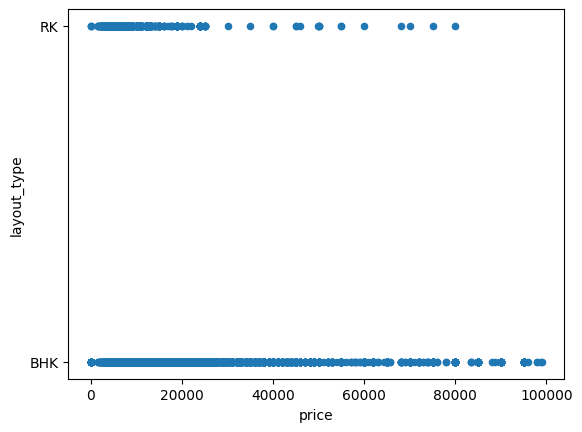

In [194]:
coluna_analise_layout_type_x_preco = 'layout_type'

statis = analise_preco(coluna_analise_layout_type_x_preco)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise_layout_type_x_preco)

<AxesSubplot: ylabel='price'>

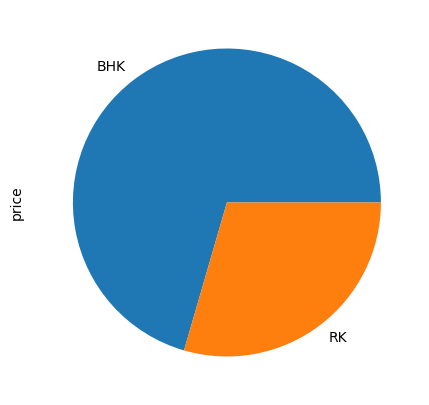

In [195]:
df.groupby(coluna_analise_layout_type_x_preco)['price'].mean().plot(kind='pie', rot=0, figsize=(15,5))

#### Coluna - 'property_type' x 'price'

{'Apartment': {'MEDIA': 19714.58, 'MODA': 15000.0, 'MEDIANA': 16000.0, 'DESVIO PADRAO': 13265.0, 'QUARTIS': [11000.0, 16000.0, 25000.0]}, 'Independent House': {'MEDIA': 13795.22, 'MODA': 10000.0, 'MEDIANA': 10000.0, 'DESVIO PADRAO': 12549.78, 'QUARTIS': [7000.0, 10000.0, 15000.0]}, 'Independent Floor': {'MEDIA': 14422.71, 'MODA': 10000.0, 'MEDIANA': 11500.0, 'DESVIO PADRAO': 10502.57, 'QUARTIS': [8000.0, 11500.0, 17000.0]}, 'Studio Apartment': {'MEDIA': 7635.44, 'MODA': 5000.0, 'MEDIANA': 6000.0, 'DESVIO PADRAO': 6713.66, 'QUARTIS': [5000.0, 6000.0, 8000.0]}, 'Villa': {'MEDIA': 25692.91, 'MODA': 30000.0, 'MEDIANA': 22000.0, 'DESVIO PADRAO': 22062.81, 'QUARTIS': [9000.0, 22000.0, 35000.0]}, 'Penthouse': {'MEDIA': 13183.25, 'MODA': 6666.0, 'MEDIANA': 8500.0, 'DESVIO PADRAO': 12833.5, 'QUARTIS': [6391.5, 8500.0, 13000.0]}}


<AxesSubplot: xlabel='price', ylabel='property_type'>

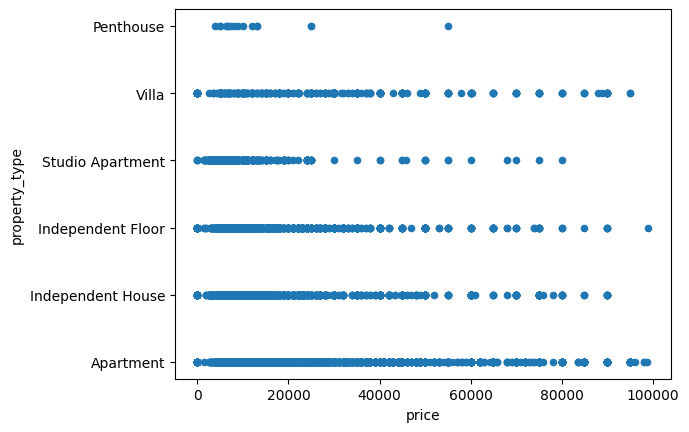

In [196]:
coluna_analise_property_type_x_preco = 'property_type'

statis = analise_preco(coluna_analise_property_type_x_preco)
print(statis)


df.plot(kind='scatter', x='price', y=coluna_analise_property_type_x_preco)

<AxesSubplot: ylabel='price'>

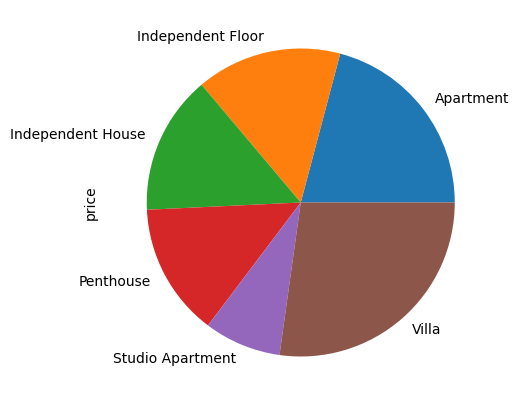

In [197]:
df.groupby(coluna_analise_property_type)['price'].mean().plot(kind='pie', rot=0, figsize=(15,5))

## Algoritmo de associação

In [198]:
df['property_location'] = df['locality'] + ', ' + df['property_type']

In [199]:
df['property_location']

0                         Ambattur, Apartment
1                      Kelambakkam, Apartment
2                            Adyar, Apartment
3                        Sembakkam, Apartment
4                Mogappair, Independent House
                        ...                  
9895                      New Town, Apartment
9896                     Baguihati, Apartment
9897    Dum Dum Cantonment, Independent Floor
9898               Shibpur, Independent Floor
9899              Kanchrapara Loco, Apartment
Name: property_location, Length: 28944, dtype: object

In [200]:
data = list(df['property_location'].apply(lambda x:x.split(",") ))

In [201]:
encoder = TransactionEncoder()

df_encoded = encoder.fit(data).transform(data)
df_encoded = pd.DataFrame(df_encoded, columns=encoder.columns_)
df_encoded

,Apartment,Independent Floor,Independent House,Penthouse,Studio Apartment,Villa,100 Feet Road,200 Feet Road,3rd Phase KPHB,6th Phase KPHB,...,raghunathpur,raidurgam,rajarhat newtown,sahakara nagar,salt lake sec iii,silpa park,south dum dum,sriram nagar kondapur,tambaram west,vivekananda Nagar
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28939,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28940,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28941,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28942,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [202]:
df_encoded = df_encoded.replace({False: 0, True: 1})
df_encoded

,Apartment,Independent Floor,Independent House,Penthouse,Studio Apartment,Villa,100 Feet Road,200 Feet Road,3rd Phase KPHB,6th Phase KPHB,...,raghunathpur,raidurgam,rajarhat newtown,sahakara nagar,salt lake sec iii,silpa park,south dum dum,sriram nagar kondapur,tambaram west,vivekananda Nagar
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28939,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28940,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28941,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28942,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
df_apriori = apriori(df_encoded, 0.001, use_colnames = True)
df_apriori

C:\Users\anjos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.675408,( Apartment)
1,0.117192,( Independent Floor)
2,0.145833,( Independent House)
3,0.045847,( Studio Apartment)
4,0.015167,( Villa)
...,...,...
410,0.001036,"( Studio Apartment, Begumpet)"
411,0.001417,"(Gachibowli, Studio Apartment)"
412,0.001727,"(Keshtopur, Studio Apartment)"
413,0.001658,"(Madhapur, Studio Apartment)"


In [204]:
df_ar = association_rules(df_apriori, metric="confidence", min_threshold=0.6)
df_ar
df_ar.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,(Iyappanthangal),( Apartment),0.001658,0.675408,0.001658,1.000000,1.480587,0.000538,inf
108,(Topsia),( Apartment),0.002004,0.675408,0.002004,1.000000,1.480587,0.000650,inf
26,(Gariahat),( Apartment),0.001071,0.675408,0.001071,1.000000,1.480587,0.000348,inf
102,(Telecom Nagar),( Apartment),0.002315,0.675408,0.002280,0.985075,1.458489,0.000717,21.747685
101,(Tangra),( Apartment),0.005217,0.675408,0.005113,0.980132,1.451172,0.001590,16.337813
...,...,...,...,...,...,...,...,...,...
116,(Aminpur),( Independent House),0.002211,0.145833,0.001347,0.609375,4.178571,0.001025,2.186667
44,(Kodambakkam),( Apartment),0.003973,0.675408,0.002418,0.608696,0.901227,-0.000265,0.829514
81,(Perungudi),( Apartment),0.004941,0.675408,0.003006,0.608392,0.900777,-0.000331,0.828870
92,(Saroor Nagar),( Apartment),0.001762,0.675408,0.001071,0.607843,0.899965,-0.000119,0.827710


#### Indicações de anomalias

Analisando os 5 primeiros registros: 

* Em Iyappanthangal, a probabilidade do tipo de proriedade alugada ser um apartamento é de 48%
* 0.2% dos aluguéis da Índia estão em Topsia
* A confiança indica que 100% de quem aluga em Gariahat, faz o aluguel de um apartamento
* Aluguéis em Telecom Nagar representam 0.23% do total do país, e dentro desse valor, 68% são apartamentos
* O suporte entre tipo de propriedade 'apartamento' e a cidade 'Tangra'
indica 0.5% 

In [205]:
df[df['price'] < 1000000]

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,dataset,property_location
0,OWNER,3.0,BHK,Apartment,Ambattur,17000.0,1570.0,Semi-Furnished,2,Chennai,"Ambattur, Apartment"
1,OWNER,2.0,BHK,Apartment,Kelambakkam,16000.0,1402.0,Semi-Furnished,2,Chennai,"Kelambakkam, Apartment"
2,OWNER,2.0,BHK,Apartment,Adyar,20000.0,800.0,Semi-Furnished,2,Chennai,"Adyar, Apartment"
3,OWNER,2.0,BHK,Apartment,Sembakkam,14000.0,1180.0,Unfurnished,2,Chennai,"Sembakkam, Apartment"
4,OWNER,1.0,BHK,Independent House,Mogappair,7000.0,400.0,Unfurnished,1,Chennai,"Mogappair, Independent House"
...,...,...,...,...,...,...,...,...,...,...,...
9895,OWNER,3.0,BHK,Apartment,New Town,19000.0,1400.0,Semi-Furnished,2,Kolkata,"New Town, Apartment"
9896,OWNER,2.0,BHK,Apartment,Baguihati,12000.0,925.0,Semi-Furnished,2,Kolkata,"Baguihati, Apartment"
9897,OWNER,2.0,BHK,Independent Floor,Dum Dum Cantonment,5500.0,650.0,Semi-Furnished,1,Kolkata,"Dum Dum Cantonment, Independent Floor"
9898,OWNER,3.0,BHK,Independent Floor,Shibpur,7500.0,960.0,Unfurnished,1,Kolkata,"Shibpur, Independent Floor"


###